In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('lmws_boiler_data-2024-2025.csv.gz', low_memory=False)

# Convert _time to datetime
df['_time'] = pd.to_datetime(df['_time'], format='ISO8601')

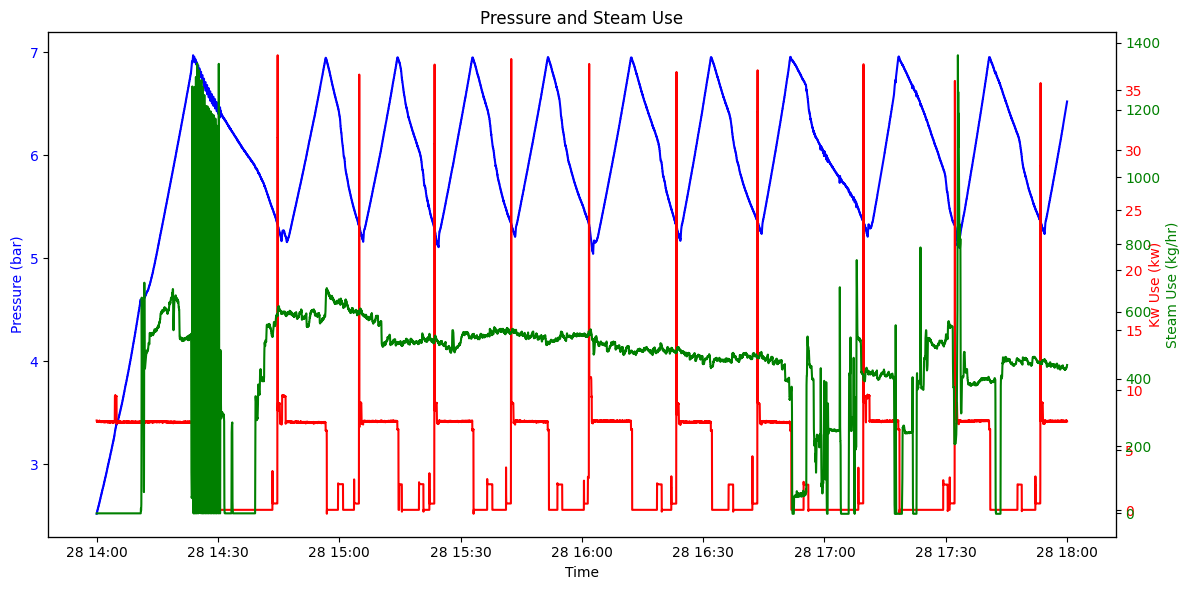

In [42]:
start_date = '2025-11-28 14:00:00'
end_date = '2025-11-28 18:00:00'
filtered_df = df[(df['_time'] >= start_date) & (df['_time'] <= end_date)]

# Plot pressure and temperature on separate axes
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(filtered_df['_time'], filtered_df['pressure'].interpolate(method='linear'), 'b-', label='Pressure')
ax1.set_xlabel('Time')
ax1.set_ylabel('Pressure (bar)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(filtered_df['_time'], filtered_df['kw'], 'r-', label='Kw Use')
ax2.set_ylabel('Kw Use (kw)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

ax3 = ax1.twinx()
ax3.plot(filtered_df['_time'], filtered_df['steam'], 'g-', label='Steam Use')
ax3.set_ylabel('Steam Use (kg/hr)', color='g')
ax3.tick_params(axis='y', labelcolor='g')

plt.title('Pressure and Steam Use')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

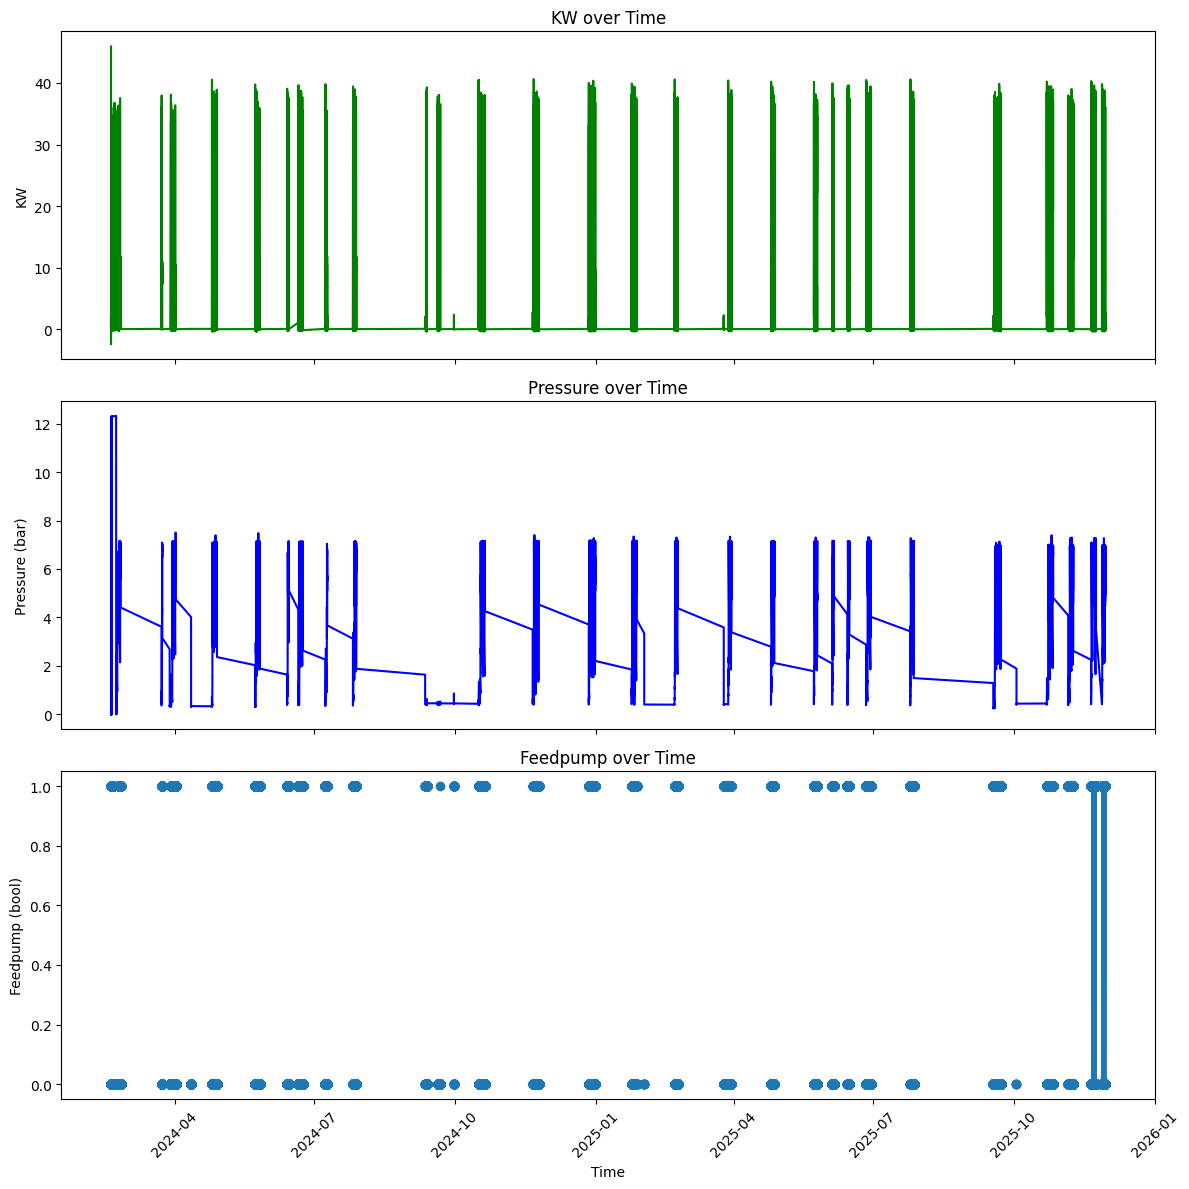

In [45]:
# Plot kw, pressure, and feedpump in subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

ax1.plot(df['_time'], df['kw'], 'g-')
ax1.set_ylabel('KW')
ax1.set_title('KW over Time')

ax2.plot(df['_time'], df['pressure'].interpolate(method='linear', limit=20), 'b-')
ax2.set_ylabel('Pressure (bar)')
ax2.set_title('Pressure over Time')

ax3.plot(df['_time'], df['feedpump'], 'o-')
ax3.set_ylabel('Feedpump (bool)')
ax3.set_title('Feedpump over Time')
ax3.set_xlabel('Time')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

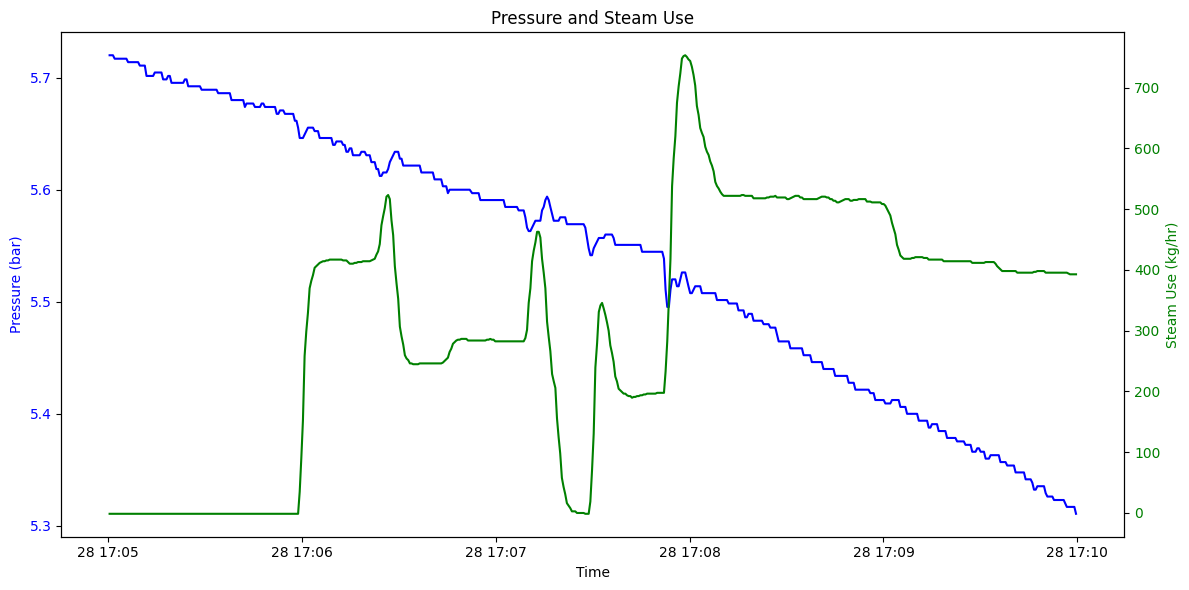

In [49]:
start_date = '2025-11-28 17:05:00'
end_date = '2025-11-28 17:10:00'
filtered_df = df[(df['_time'] >= start_date) & (df['_time'] <= end_date)]

# Plot pressure and temperature on separate axes
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(filtered_df['_time'], filtered_df['pressure'].interpolate(method='linear'), 'b-', label='Pressure')
ax1.set_xlabel('Time')
ax1.set_ylabel('Pressure (bar)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax3 = ax1.twinx()
ax3.plot(filtered_df['_time'], filtered_df['steam'], 'g-', label='Steam Use')
ax3.set_ylabel('Steam Use (kg/hr)', color='g')
ax3.tick_params(axis='y', labelcolor='g')

plt.title('Pressure and Steam Use')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

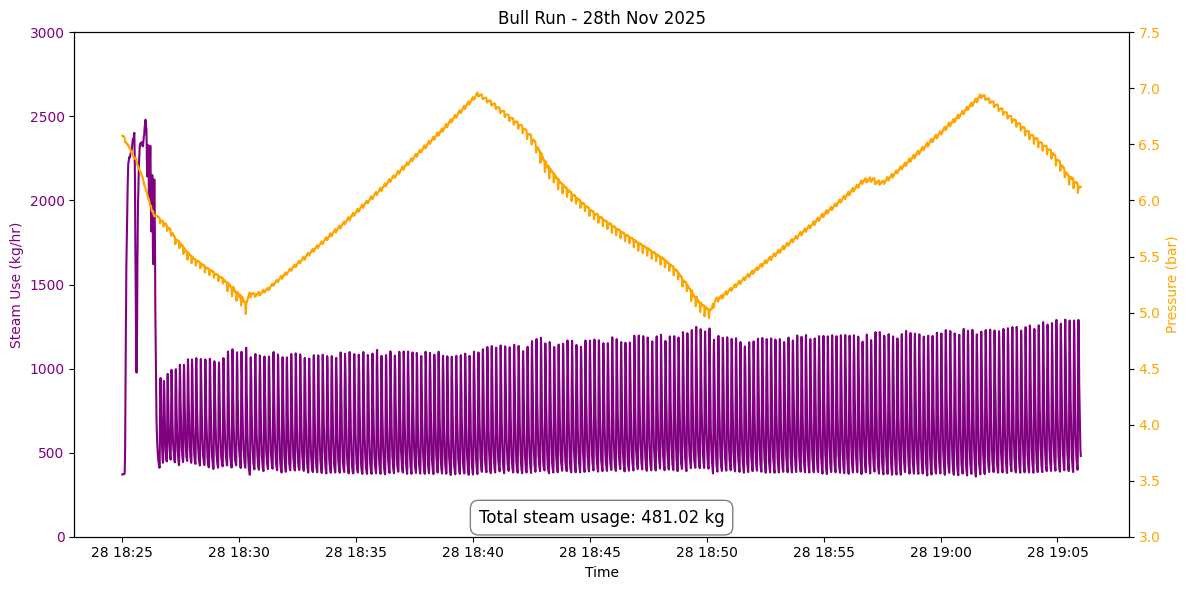

In [ ]:
start_date = "2025-11-28 18:25:00"
end_date = "2025-11-28 19:06:00"
filtered_df = df[(df["_time"] >= start_date) & (df["_time"] <= end_date)]

import numpy as np

auc = (
    np.trapezoid(filtered_df["steam"], x=filtered_df["_time"].astype("int64") / 1e9)
    / 3600
)

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(filtered_df["_time"], filtered_df["steam"], color="purple", label="Steam Use")
ax1.set_xlabel("Time")
ax1.set_ylabel("Steam Use (kg/hr)", color="purple")
ax1.tick_params(axis="y", labelcolor="purple")
ax1.set_ylim(bottom=0, top=3000)

ax2 = ax1.twinx()
ax2.plot(
    filtered_df["_time"], filtered_df["pressure"], color="orange", label="Pressure"
)
ax2.set_ylabel("Pressure (bar)", color="orange")
ax2.tick_params(axis="y", labelcolor="orange")
ax2.set_ylim(bottom=3, top=7.5)

plt.title("Bull Run - 28th Nov 2025")
plt.xticks(rotation=45)

plt.text(
    0.5,
    0.02,
    f"Total steam usage: {auc:.2f} kg",
    transform=ax1.transAxes,
    fontsize=12,
    verticalalignment="bottom",
    horizontalalignment="center",
    bbox=dict(boxstyle="round,pad=0.5", facecolor="white", alpha=0.5),
)

plt.tight_layout()
plt.show()